In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas
from scipy.signal import detrend
from statsmodels.tsa.api import VAR


In [2]:
freq_sampling = 256

In [3]:
full_path_file = 'C:/Users/Juan/PycharmProjects/thought-cmd/data/epochs/subj_1_anger_raw_try-1.csv'
data_epoch = pandas.read_csv(full_path_file)
print(data_epoch)

      time condition  epoch       A31       B21        B27        E32  \
0    -1000    press1      0 -1.111703 -6.874750  -5.106199  -2.207037   
1     -996    press1      0  1.078888 -5.354640  -7.513933  -6.528532   
2     -992    press1      0  0.664531 -4.385862  -9.994412  -8.629079   
3     -988    press1      0 -3.818691 -6.476280 -12.892279 -12.214420   
4     -984    press1      0 -7.081642 -5.797892 -13.277219 -13.718423   
...    ...       ...    ...       ...       ...        ...        ...   
1273  3973    press1      0 -4.627437 -0.637247   0.601285   0.236700   
1274  3977    press1      0 -8.019693 -4.167887   0.732890   0.074830   
1275  3980    press1      0 -8.009553 -3.856514   5.563623  -0.133760   
1276  3984    press1      0 -7.180942 -5.135098  10.331578  -1.316821   
1277  3988    press1      0 -5.813427 -6.564764  12.262872  -1.763435   

            H11        H17  
0    -11.999316  -5.028861  
1    -15.015119  -3.675152  
2    -15.731316  -3.725549  
3    -1

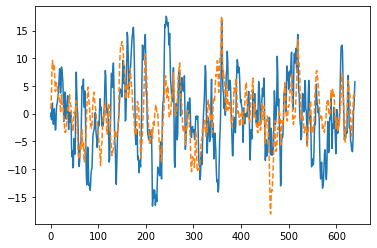

In [4]:
duration = 2.5
init_limit = int(freq_sampling)
end_limit = int((freq_sampling * duration) + init_limit)

data = data_epoch.to_numpy()[init_limit:end_limit, 3:]
data_detrended = detrend(data, axis=1)
plt.plot(data[:, 0])
plt.plot(data_detrended[:, 0], '--')

In [5]:
# make a VAR model
model = VAR(data_detrended)

results = model.fit(6)
results.summary()

C:\Users\Juan\.conda\envs\mne\lib\site-packages\statsmodels\tsa\vector_ar\var_model.py:1416: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params()))
C:\Users\Juan\.conda\envs\mne\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\Juan\.conda\envs\mne\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\Juan\.conda\envs\mne\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 18, Apr, 2021
Time:                     22:46:07
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                   -23.5070
Nobs:                     634.000    HQIC:                  -24.4606
Log likelihood:           2770.27    FPE:                1.30119e-11
AIC:                     -25.0660    Det(Omega_mle):     9.25851e-12
--------------------------------------------------------------------
Results for equation y1
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const            -0.000066         0.043480           -0.002           0.999
L1.y1  103612317699.313156              NAN              NAN             NAN
L1.y2  131147369010.485962              NAN              NAN             NAN
L1

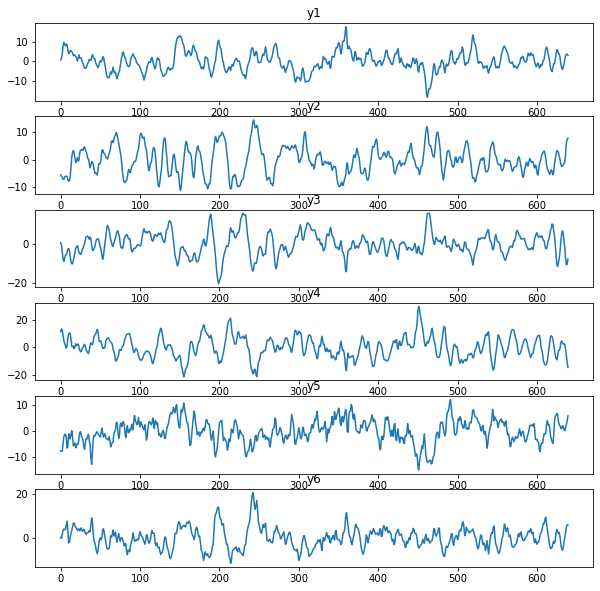

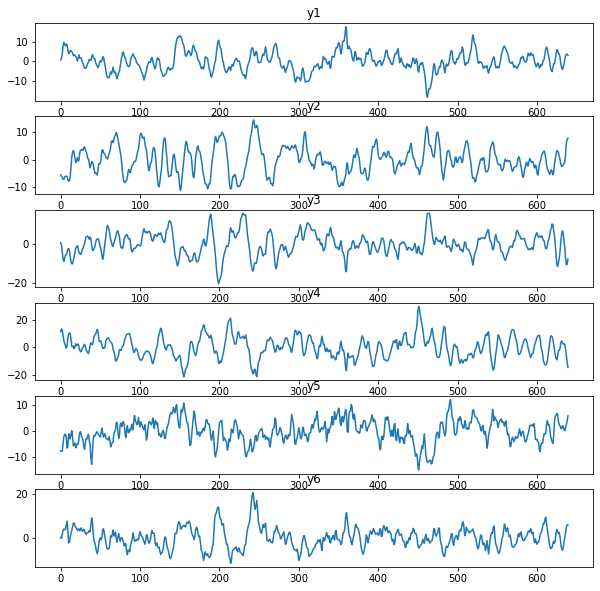

In [6]:
results.plot()

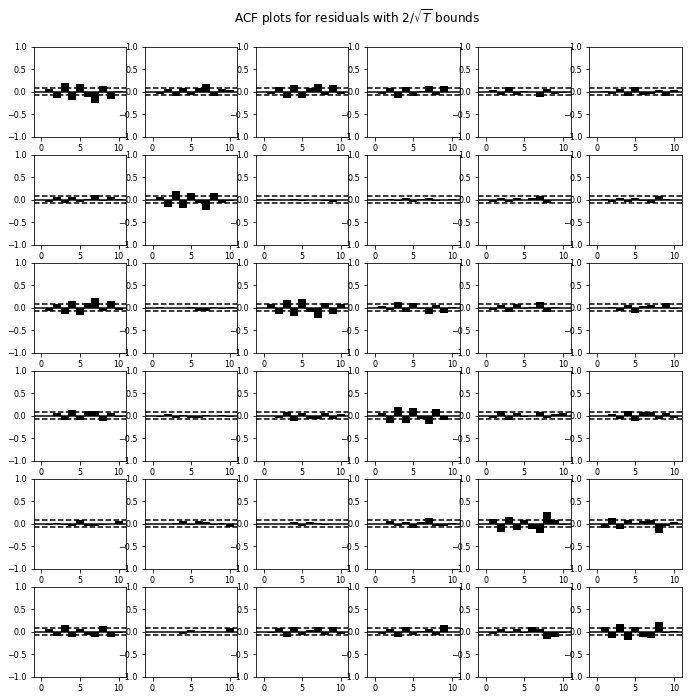

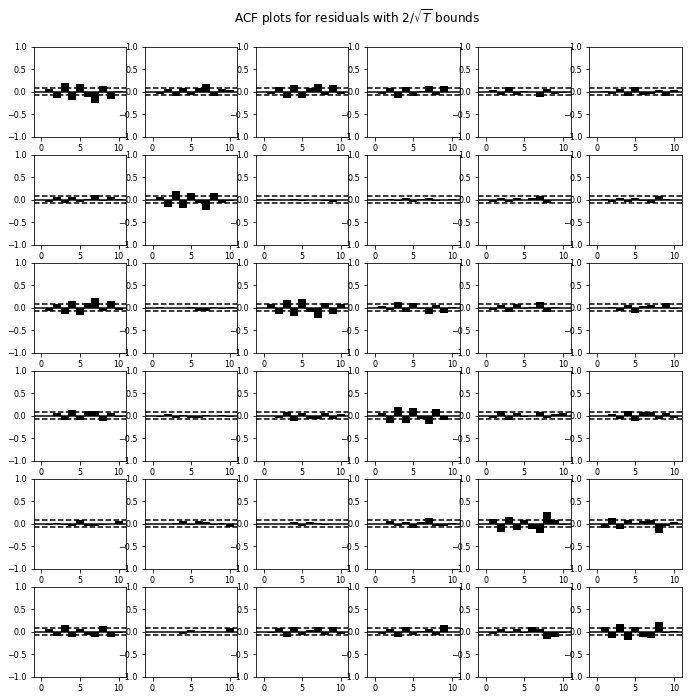

In [7]:
results.plot_acorr()

In [8]:
results = model.fit(maxlags=15)
results.summary()

C:\Users\Juan\.conda\envs\mne\lib\site-packages\statsmodels\tsa\vector_ar\var_model.py:1416: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params()))
C:\Users\Juan\.conda\envs\mne\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\Juan\.conda\envs\mne\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\Juan\.conda\envs\mne\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 18, Apr, 2021
Time:                     22:46:15
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                   -22.1317
Nobs:                     625.000    HQIC:                  -24.5021
Log likelihood:           3352.65    FPE:                5.12945e-12
AIC:                     -26.0085    Det(Omega_mle):     2.26920e-12
--------------------------------------------------------------------
Results for equation y1
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const             -0.007876         0.031346           -0.251           0.802
L1.y1   -91916538296.717560              NAN              NAN             NAN
L1.y2   -57490154643.511902    155887.197598      -368793.304           0.0

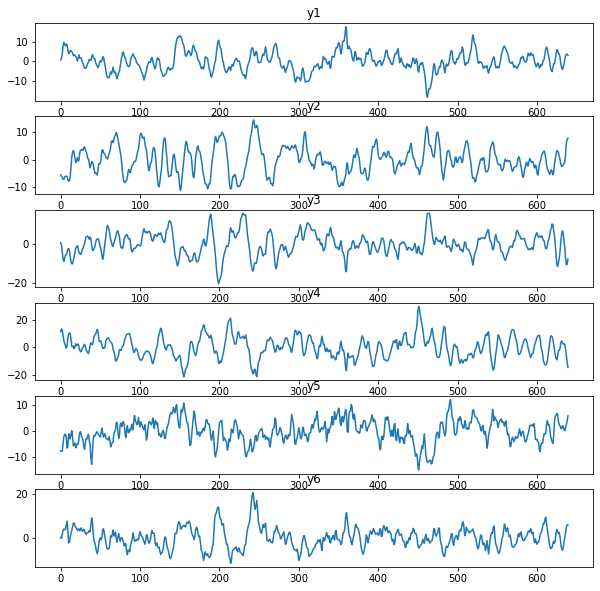

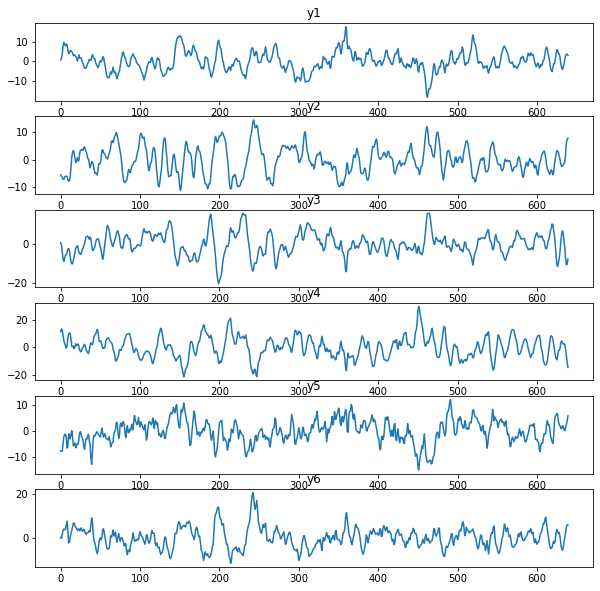

In [9]:
results.plot()


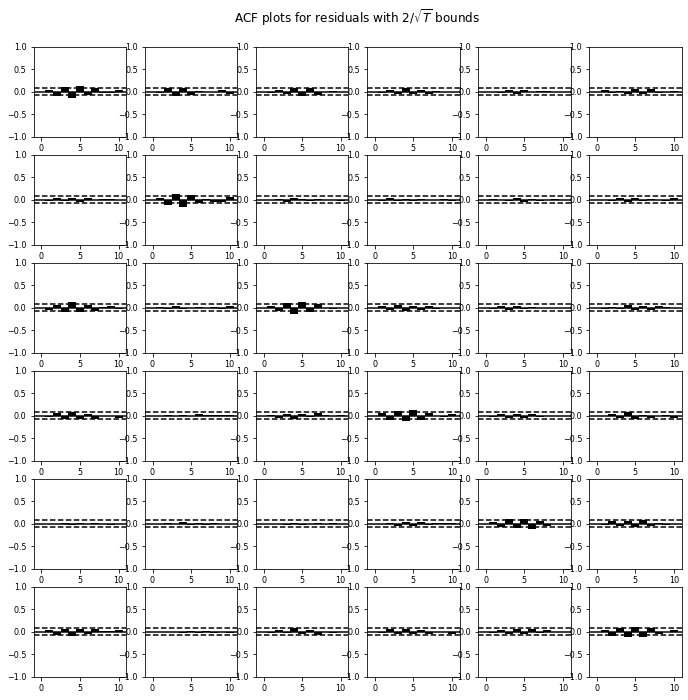

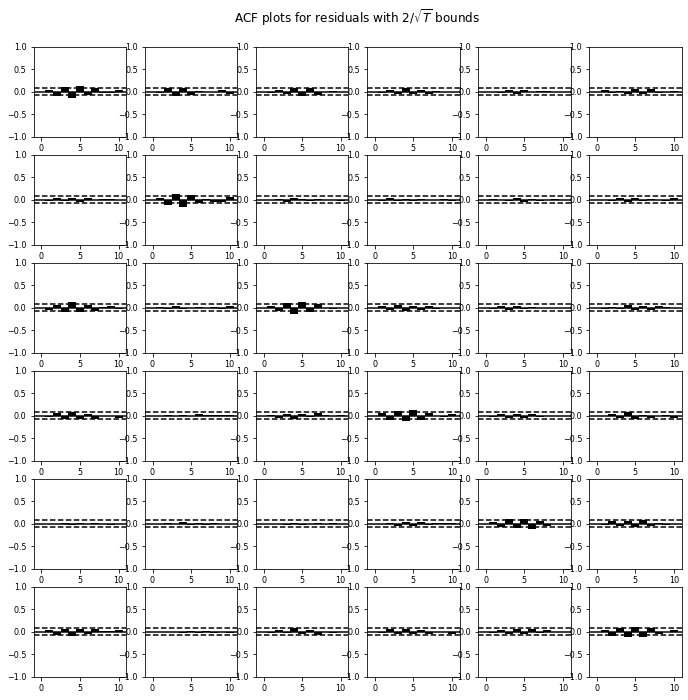

In [10]:
results.plot_acorr()